In [2]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
sushi = pd.read_csv("sushi.csv", index_col = 0)
print(len(sushi))
sushi.head()


2459


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,TN,37201,36.159886,-86.773197,4.0,161,0,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","Restaurants, Japanese, Seafood","{'Wednesday': '16:0-22:0', 'Thursday': '16:0-2..."
83,NZ_bFJma7brQUfln5h1UAg,Super Sushi Kyo Hin,2501 Mt Holly Rd 245,Burlington,NJ,08016,40.041629,-74.825821,3.5,6,0,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Japanese, Sushi Bars, Asian Fusion",NaN
151,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107,39.947033,-75.157434,4.5,72,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
186,7Du9oW73YcYFmXdtU5aiSg,Kinjo's Japanese Restaurant,2875 Tyrone Blvd N,Saint Petersburg,FL,33710,27.797263,-82.733913,3.5,17,0,"{'RestaurantsPriceRange2': '2', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."


In [28]:
sushi_light = sushi.loc[~(pd.isna(sushi["attributes"])), 
                    ["business_id", "name", "address", "state", "city", "stars", "postal_code","latitude","longitude", "review_count", "attributes", "categories", "hours"]]

In [29]:
sushi_light["attributes"] = sushi_light["attributes"].apply(ast.literal_eval)
attr_df= pd.json_normalize(sushi_light["attributes"])
attr_df.index = sushi_light.index
sushi_comb = sushi_light.join(attr_df)
sushi_comb.head

<bound method NDFrame.head of                    business_id                         name  \
15      MUTTqe8uqyMdBl186RmNeA                     Tuna Bar   
27      tMkwHmWFUEXrC9ZduonpTg           The Green Pheasant   
83      NZ_bFJma7brQUfln5h1UAg          Super Sushi Kyo Hin   
151     WYYdQDjx-DsCanlP0DpImQ                      J Sushi   
186     7Du9oW73YcYFmXdtU5aiSg  Kinjo's Japanese Restaurant   
...                        ...                          ...   
150025  ANTj0UD-OS7Zod3mulUg6w                  Fork & Stix   
150171  8wjRidyw7pqepAf5MncA-g                 Tokiwa Ramen   
150201  xGcpC8D4Sio-bN9KCr054g     Zen Bistro Grill + Sushi   
150214  2xxkaRy7rP5EUyjFt2J5kA                  Nikka Ramen   
150276  Rn3DtOiuJtc3whFySWXs5Q             Japanese Village   

                      address state              city  stars postal_code  \
15                205 Race St    PA      Philadelphia    4.0       19106   
27              215 1st Ave S    TN         Nashville    4.0 

In [30]:
for idx in sushi_comb.index:
    if type(sushi_comb.loc[idx, "BusinessParking"]) is str:
        sushi_comb.loc[idx, "BusinessParking"] = [ast.literal_eval(sushi_comb.loc[idx, "BusinessParking"])]
parking = pd.json_normalize(sushi_comb["BusinessParking"])
parking.index = sushi_comb.index
sushi_park = sushi_comb.join(parking)

sushi_park.replace('None', np.nan, inplace=True)
sushi_park.head()


,business_id,name,address,state,city,stars,postal_code,latitude,longitude,review_count,...,BYOB,Corkage,DriveThru,ByAppointmentOnly,AgesAllowed,valet,garage,street,lot,validated
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,PA,Philadelphia,4.0,19106,39.953949,-75.143226,245,...,NaN,NaN,NaN,NaN,NaN,False,None,True,False,None
27,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,TN,Nashville,4.0,37201,36.159886,-86.773197,161,...,NaN,NaN,NaN,NaN,NaN,True,True,False,False,True
83,NZ_bFJma7brQUfln5h1UAg,Super Sushi Kyo Hin,2501 Mt Holly Rd 245,NJ,Burlington,3.5,08016,40.041629,-74.825821,6,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
151,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,PA,Philadelphia,4.5,19107,39.947033,-75.157434,72,...,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False
186,7Du9oW73YcYFmXdtU5aiSg,Kinjo's Japanese Restaurant,2875 Tyrone Blvd N,FL,Saint Petersburg,3.5,33710,27.797263,-82.733913,17,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False


In [63]:
sushi_park.to_csv('sushi_park.csv')

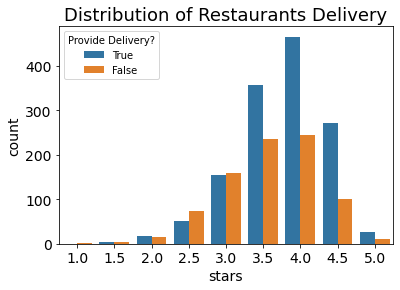

In [101]:
p1 = sns.countplot(x='stars', hue = 'RestaurantsDelivery', data = sushi_park)
p1.legend(loc='upper left')
p1.get_legend().set_title("Provide Delivery?")
plt.title('Distribution of Restaurants Delivery', size = 18)
plt.xlabel("stars", size = 14)
plt.xticks(size = 14)
plt.ylabel("count", size = 14)
plt.yticks(size = 14)
plt.show()

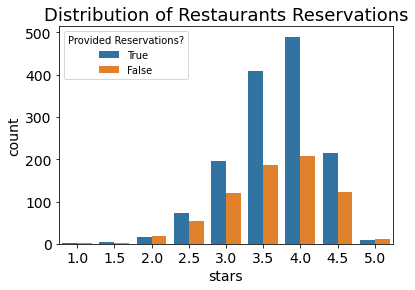

In [102]:
p2 = sns.countplot(x='stars', hue = 'RestaurantsReservations', data = sushi_park)
p2.legend(loc='upper left')
p2.get_legend().set_title("Provided Reservations?")
plt.title('Distribution of Restaurants Reservations', size = 18)
plt.xlabel("stars", size = 14)
plt.xticks(size = 14)
plt.ylabel("count", size = 14)
plt.yticks(size = 14)
plt.show()

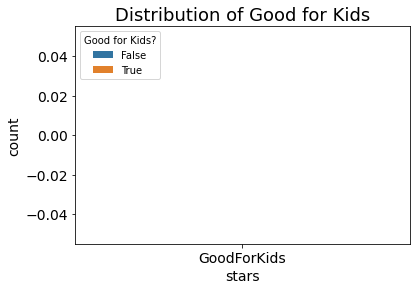

In [118]:
p3 = sns.countplot(x='stars', hue = 'GoodForKids', data = sushi_park)
p3.legend(loc='upper left')
p3.get_legend().set_title("Good for Kids?")
plt.title('Distribution of Good for Kids', size = 18)
plt.xlabel("stars", size = 14)
plt.xticks(size = 14)
plt.ylabel("count", size = 14)
plt.yticks(size = 14)
plt.show()

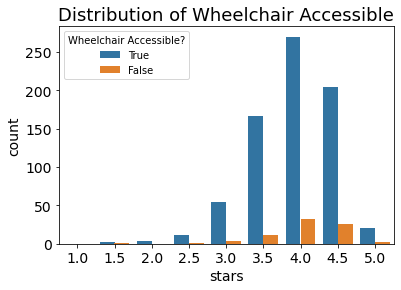

In [109]:
p4 = sns.countplot(x='stars', hue = 'WheelchairAccessible', data = sushi_park)
p4.legend(loc='upper left')
p4.get_legend().set_title("Wheelchair Accessible?")
plt.title('Distribution of Wheelchair Accessible', size = 18)
plt.xlabel("stars", size = 14)
plt.xticks(size = 14)
plt.ylabel("count", size = 14)
plt.yticks(size = 14)
plt.show()

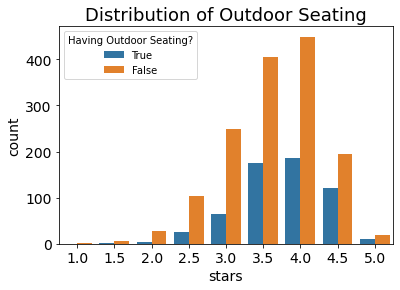

In [58]:
p4 = sns.countplot(x='stars', hue = 'OutdoorSeating', data = sushi_park)
p4.legend(loc='upper left')
p4.get_legend().set_title("Having Outdoor Seating?")
plt.title('Distribution of Outdoor Seating', size = 18)
plt.xlabel("stars", size = 14)
plt.xticks(size = 14)
plt.ylabel("count", size = 14)
plt.yticks(size = 14)
plt.show()

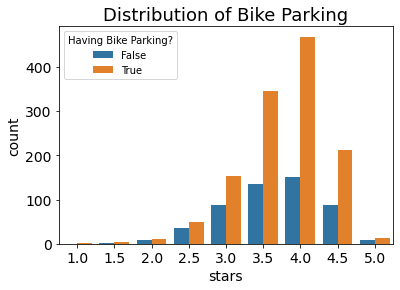

In [59]:
p4 = sns.countplot(x='stars', hue = 'BikeParking', data = sushi_park)
p4.legend(loc='upper left')
p4.get_legend().set_title("Having Bike Parking?")
plt.title('Distribution of Bike Parking', size = 18)
plt.xlabel("stars", size = 14)
plt.xticks(size = 14)
plt.ylabel("count", size = 14)
plt.yticks(size = 14)
plt.show()